In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('/home/meetspar/Downloads/datasets_20710_26737_Bengaluru_House_Data.csv')

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1)

In [7]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df3 = df2.dropna()

In [9]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df3['BHK'] = df3['size'].apply( lambda x: x.split(' ')[0])

/tmp/ipykernel_4750/126027413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply( lambda x: x.split(' ')[0])


In [11]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df4 = df3.drop(['size'], axis = 1)

In [13]:
df4

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
 df5 = df4[ ~df4['total_sqft'].apply(is_float) ]
df5.head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [17]:
def total_sqft_prep(x):
    tokens = x.split('-')
    if( len(tokens) == 2 ):
        return (float(tokens[0])+float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [18]:
df5 = df4.copy()
df5

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [19]:
df5['total_sqft'] = df5['total_sqft'].apply(total_sqft_prep)

In [20]:
df5['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [21]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [22]:
df5.dropna(inplace = True)

In [23]:
df5_grp = df5.groupby('location')['location'].agg('count').sort_values(ascending = 0)

In [24]:
df5_grp

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [25]:
df5_less_10 = df5_grp[ df5_grp<=10 ]

In [26]:
def other_loc(x):
    if x in df5_less_10:
        return 'other'
    else:
        return x

In [27]:
df5['location'] = df5['location'].apply(other_loc)

In [28]:
len(df5['location'].unique())

241

In [29]:
df5.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [30]:
df5['BHK'] = df5['BHK'].apply(lambda x: float(x))

In [31]:
df6 = df5[~(df5.total_sqft/df5.BHK < 300)]

In [32]:
df6

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


In [33]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
import numpy as np
def pps_outlier(df):
    out_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft >= (m-st)) & (subdf.price_per_sqft <= (m+st))]
        out_df = pd.concat([out_df, red_df], ignore_index = True)
    return out_df

In [35]:
df7 = pps_outlier(df6)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

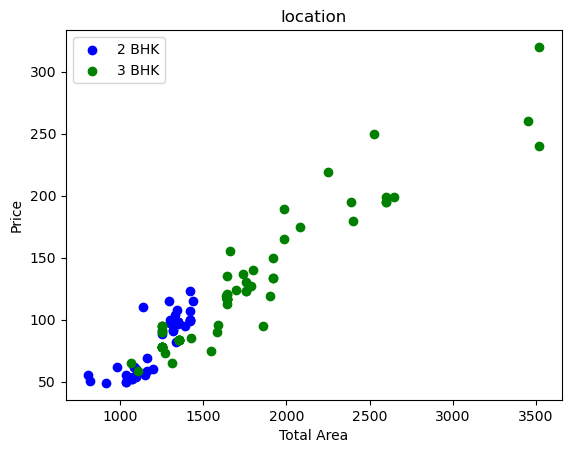

In [37]:
def plt_scatter(df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, label='2 BHK', color = 'blue')
    plt.scatter(bhk3.total_sqft, bhk3.price, label='3 BHK', color = 'green')
    plt.xlabel('Total Area')
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()

plt_scatter(df7, 'Hebbal')

In [38]:
def bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)
    return df.drop(exclude_indices, axis=0)
            
            

In [39]:
df8 = bhk_outliers(df7)

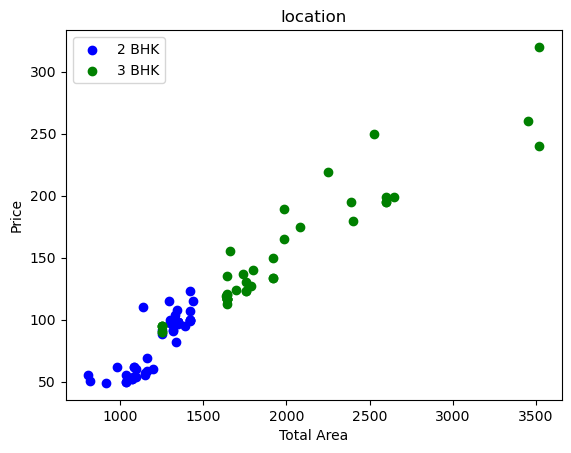

In [40]:
plt_scatter(df8, 'Hebbal')

Text(0, 0.5, 'count')

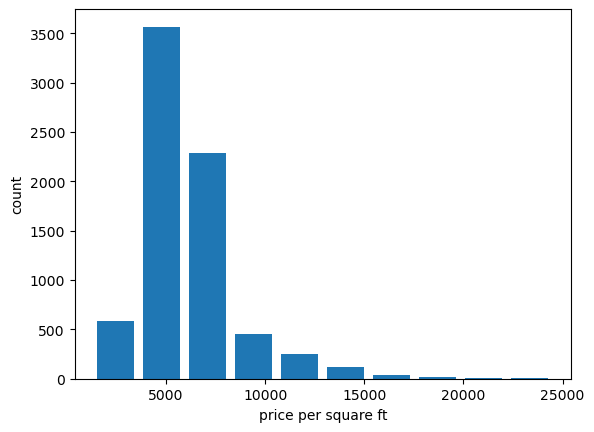

In [41]:
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('price per square ft')
plt.ylabel('count')

In [42]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df8[df8.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
5267,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
8468,other,12000.0,12.0,525.0,10.0,4375.000000
8557,other,10000.0,16.0,550.0,16.0,5500.000000
9297,other,6000.0,12.0,150.0,11.0,2500.000000
9629,other,5425.0,13.0,275.0,13.0,5069.124424


In [44]:
def bath_outliers(df):
    return df[df.bath<df.BHK+2]

In [45]:
df9 = bath_outliers(df8)

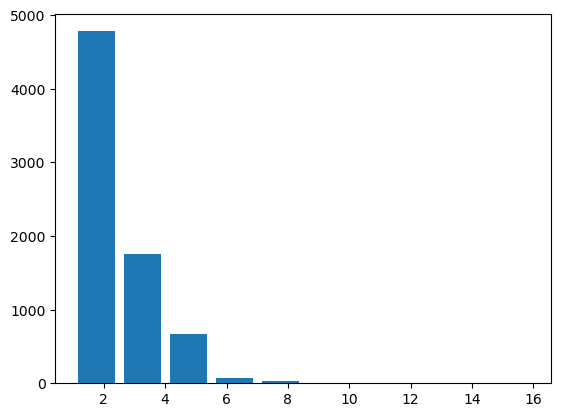

In [46]:
plt.hist(df8.bath, rwidth=.8)
xlabel='Bath'
ylabl ='count'

In [47]:
df9

,location,total_sqft,bath,price,BHK,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,4540.654699
...,...,...,...,...,...,...
10226,other,1200.0,2.0,70.0,2.0,5833.333333
10227,other,1800.0,1.0,200.0,1.0,11111.111111
10230,other,1353.0,2.0,110.0,2.0,8130.081301
10231,other,812.0,1.0,26.0,1.0,3201.970443


In [48]:
df10 = df9.drop(['price_per_sqft'], axis = 1)

In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11 = pd.concat([df10, dummies.drop('other', axis=1)], axis=1)

In [51]:
df11

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,other,1200.0,2.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10227,other,1800.0,1.0,200.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10230,other,1353.0,2.0,110.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10231,other,812.0,1.0,26.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 = df11.drop('location', axis=1)
df12.head(3)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X = df12.drop('price', axis=1)
y = df12.price

In [54]:
X.head(3)

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7529017505423965

In [69]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_clf, X, y, cv=ss)

In [70]:
scores

array([0.84680687, 0.82568316, 0.86227902, 0.85594004, 0.78070549])

In [79]:
def predict_price(location, sqft, bath, BHK):
    loc_ind = X.columns.get_loc(location)
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    
    if loc_ind>=0:
        x[loc_ind]=1
        
    return lr_clf.predict([x])[0]

In [85]:
predict_price('Indira Nagar', 1000, 2, 2)

/home/meetspar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.97505616190847

In [84]:
X.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [86]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [90]:
import json
columns = {
    'data_columns' : [ col.lower() for col in X.columns]
}

s = json.dumps(columns)

with open("columns.json",'w') as f:
    f.write(s)